<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.3.0


In [31]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_original = x_train
x_test_original = x_test

4423680/4422102 [==============================] - 1s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

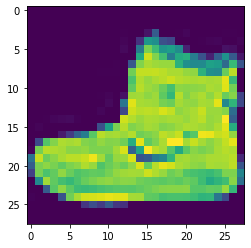

In [6]:
y =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

np.set_printoptions(linewidth=200)

print(x_train[0])
plt.imshow(x_train[0])
print(y_train[0])
print(y[y_train[0]])

In [7]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten

# Build the model

i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)
model.summary()

# Note if a model is built without the input then you can't print the model.summary
#model = Sequential()   
#model.add(Flatten())
#model.add(Dense(128, activation = 'relu'))
#model.add(Dense(10, activation = 'softmax'))


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4961 - accuracy: 0.8261: 0s - loss: 0.4999 - accu
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3705 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3325 - accuracy: 0.8789: 1s - loss: 0.3384 - accura - E
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8910: 0s - loss:


In [14]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8749


[0.34695965051651, 0.8748999834060669]

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

p_test =  np.argmax(model.predict(x_test), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.76      0.78      1000
           3       0.84      0.91      0.87      1000
           4       0.75      0.83      0.79      1000
           5       0.94      0.97      0.96      1000
           6       0.70      0.67      0.68      1000
           7       0.96      0.91      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

[[801   2   7  50   8   0 125   0   7   0]
 [  0 963   1  28   3   0   4   0   1   0]
 [ 11   1 760  14 134   0  80   0   0   0]
 [ 17   1   8 913  35   0  24   0   2   0]
 [  0   1  80  37 826   0  54   0   2   0]
 [  0   0   0   0   0 975 

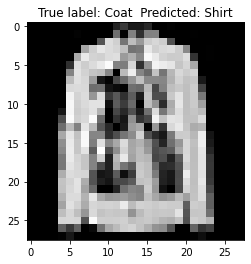

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
#plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.title("True label: %s  Predicted: %s" % (y[y_test[i]], y[p_test[i]]));

In [17]:
# Exercise 2: 
# Experiment with different values for the dense layer with 512 neurons. 
# What different results do you get for loss, training time etc? Why do you think that's the case? 

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test, verbose=0)

p_test =  np.argmax(model.predict(x_test), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4763
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3595
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3221
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2984: 0s -
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2785
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.85      0.92      0.88      1000
           4       0.78      0.79      0.79      1000
           5       0.99      0.95      0.97      1000
           6       0.67      0.70      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.94      0.96     

In [18]:
#  Increase to 1024 Neurons -- What's the impact?

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test, verbose=0)

p_test =  np.argmax(model.predict(x_test), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))


Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4750
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3577
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3220: 0s
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2966
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2788
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1000
           1       1.00      0.96      0.98      1000
           2       0.80      0.76      0.78      1000
           3       0.90      0.86      0.88      1000
           4       0.87      0.59      0.70      1000
           5       0.98      0.96      0.97      1000
           6       0.55      0.72      0.63      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0

In [19]:
# Exercise 3: 
# What would happen if you remove the Flatten() layer. Why do you think that's the case? 

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

p_test =  np.argmax(model.predict(x_test), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))

Epoch 1/5


ValueError: in user code:

    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\nn_ops.py:4175 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\nn_ops.py:4088 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


In [20]:
# Exercise 4: 
# What would happen if you had a different amount than 10? 

model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation ='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

p_test =  np.argmax(model.predict(x_test), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))

Epoch 1/5


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 4 0 3 5 3 7 1 9 5 2 8 4 3 0 4 0 9 1 0 0 0 0 0 2 8 0 2 1 3 7 9 1
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-20-33bcce61bc34>:12) ]] [Op:__inference_train_function_43495]

Function call stack:
train_function


In [21]:
# Exercise 5: 
# What will happen if you add another layer between the one with 512 and the final layer with 10. 

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

p_test =  np.argmax(model.predict(x_test), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4695
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3563: 4s - ET
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3173
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2948
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3363
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.84      0.93      0.88      1000
           4       0.79      0.80      0.79      1000
           5       0.96      0.98      0.97      1000
           6       0.73      0.65      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.93     

In [23]:
# Exercise 6: 
# Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
# Try 30 epochs
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(x_train, y_train, epochs=30)

model.evaluate(x_test, y_test)

p_test =  np.argmax(model.predict(x_test), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4966
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3759
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3379
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3149
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2965A: 1 - ETA: 0s - loss: 0.2 - ETA: 0s - loss: 0.29
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2813
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2684
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2585
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2489
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2397
Epoch 11/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2310
Epoch 12/30
1875/1875 [=============

In [24]:
# Exercise 7: 
# with out normalization

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(x_train_original, y_train, epochs=5)
model.evaluate(x_test_original, y_test, verbose=0)

p_test =  np.argmax(model.predict(x_test_original), axis=-1) 
print(classification_report(y_test,p_test))
print(confusion_matrix(y_test,p_test))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 4.1457
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5478
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5133
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4917
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4763
              precision    recall  f1-score   support

           0       0.77      0.84      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.74      0.71      0.73      1000
           3       0.87      0.86      0.87      1000
           4       0.70      0.77      0.73      1000
           5       0.90      0.91      0.91      1000
           6       0.62      0.53      0.57      1000
           7       0.93      0.93      0.93      1000
           8       0.91      0.97      0.94      1000
           9       0.93      0.89      0.91      

In [1]:
# Exercise 8: 
# call back

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5,  validation_data=(x_test, y_test), callbacks=[callbacks])

NameError: name 'tf' is not defined

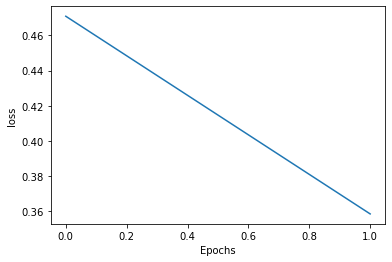

In [32]:
plot_graphs(model.history, "loss")